In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl

In [3]:
# Chargement de toutes les données
file_path = "data/database-imputed ESG.xlsx"
all_data = pd.read_excel(file_path)

In [34]:
# Variables disponibles
variables_disponibles = ["market_cap", "employees", "revenue", "scope_1", "scope_2", "scope_3",
                         "waste_production", "waste_recycling", "water_consumption",
                         "water_withdrawal", "energy_consumption", "hours_of_training",
                         "gender_pay_gap", "independent_board_members_percentage",
                         "legal_costs_paid_for_controversies", "ceo_compensation"]

# Choix de la régression
x_reg = "sum_scopes"
y_reg = "gender_pay_gap"

# Année de la régression
year_reg = "2020"

# Choix du secteur
secteur = "Steel"

# Choix de la région
reg = "Europe"

In [51]:
# Filtrage des données
data = pd.DataFrame(all_data[(all_data["year"] == int(year_reg)) & (all_data["primary_industry"] == secteur) & (all_data["region"] == reg)])

data["sum_scopes"] = (data["scope_1"] + data["scope_2"] + data["scope_3"])/data["market_cap"]

In [18]:
# Il y a des NA dans la base 
print(all_data.dropna(axis=0).shape[0] - all_data.shape[0])

-624


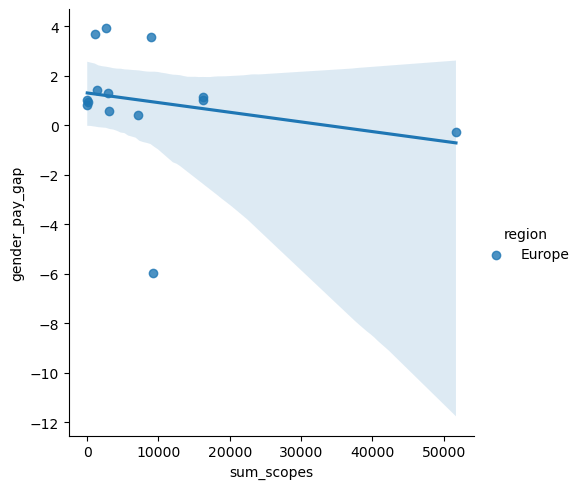

In [52]:
# Régression linéaire
model = np.polyfit(data[x_reg], data[y_reg], 1)

# Tracés avec Seaborn
sns.lmplot(x=x_reg, y=y_reg, hue="region", data=data)